In [2]:
from scipy.interpolate import interp1d
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
######################## Rf FID ########################

file_path_Rf_FID = "Tekstfiler/Rf_verider_FID.txt"

column_names_Rf_FID = ["Methane", "Ethane", "Ethene", "Propane", "Propene", "Butane", "Pentane", "Hexane"]

dataframe = pd.read_csv(file_path_Rf_FID, sep='\s+', header=None, names=column_names_Rf_FID) # make dataframe

Rf_FID = dataframe.to_numpy() # make dataframe to list
Rf_FID = np.tile(Rf_FID, (18, 1))

######################## Rf TCD ########################

file_path_Rf_TCD = "Tekstfiler/Rf_verdier_TCD.txt"

column_names2 = ["H2", "CO2", "N2", "CH4", "CO"]

dataframe2 = pd.read_csv(file_path_Rf_TCD,  sep=',', header=None, names=column_names2) # make dataframe

Rf_TCD = dataframe2.to_numpy() # make dataframe to list

Rf_TCD = np.tile(Rf_TCD, (18, 1))

######################## FID ########################

file_path_FID = "Tekstfiler/240416_FID.txt"

column_names1 = ["Methane", "Ethane", "Ethene", "Propane", "Propene", "Butane", "Pentane", "Hexane"]

df1 = pd.read_csv(file_path_FID,  sep='\s+', header=None, names = column_names1)

Ai_FID = df1.to_numpy()

######################## TCD ########################

file_path_TCD = "Tekstfiler/240416_TCD.txt"

column_names2 = ["H2", "CO2", "N2", "CH4", "CO"]

df2 = pd.read_csv(file_path_TCD,  sep='\s+', header=None, names = column_names2)

Ai_TCD = df2.to_numpy()

################ CALCULATING w_r ################

w_r_FID = Ai_FID * Rf_FID

w_r_TCD = Ai_TCD * Rf_TCD

################ CALCULATING flows ################ This is in l/min, not g/h

N2_flow = 20/60 + 0.4 # Change if the flow changes

CH4_flows = np.zeros([10,])

for i in range(10):
    CH4_flow_value = N2_flow * (w_r_TCD[i, 3]/w_r_TCD[i, 2])
    CH4_flows[i] = CH4_flow_value

################ CALCULATING TCD flows ################

TCD_flows = np.zeros((10,5))
(N, M) = TCD_flows.shape

for i in range(N):
    for j in range(M):
        TCD_flow_value = N2_flow * (w_r_TCD[i,j] / w_r_TCD[i,2])
        TCD_flows[i,j] = TCD_flow_value

################ CALCULATING FID flows ################

FID_flows = np.zeros((10, 8))

for i in range(10):
    FID_flow_value = CH4_flows[i] * (w_r_FID[i] / w_r_FID[i, 0])
    FID_flows[i] = FID_flow_value


In [4]:
time = np.array([20, 40, 60, 80, 100, 120, 140, 160, 180, 200])

integrated_values_FID_1 = []

for i in range(FID_flows.shape[1]):
    #plt.plot(time, FID_flows[:, i], label=column_names1[i])
    
    integral_values_FID_1 = spi.cumtrapz(FID_flows[:, i], time, initial=0)
    integrated_values_FID_1.append(integral_values_FID_1)

for i, name in enumerate(column_names1):
    print(f"Integrated {name}: {integrated_values_FID_1[i][-1]}")


integrated_values_TCD_1 = []

for i in range(TCD_flows.shape[1]):
    #plt.plot(time, FID_flows[:, i], label=column_names1[i])
    
    integral_values_TCD_1 = spi.cumtrapz(TCD_flows[:, i], time, initial=0)
    integrated_values_TCD_1.append(integral_values_TCD_1)

for i, name in enumerate(column_names2):
    print(f"Integrated {name}: {integrated_values_TCD_1[i][-1]}")

#print("Total FID: ", np.sum(integrated_values_FID_1))
#print("Total TCD: ", np.sum(integrated_values_TCD_1))
#print("Total: ", np.sum(integrated_values_TCD_1)+np.sum(integrated_values_FID_1)-1.7952940276719396-25.65522580664284-132.00000000000003) # fjerner methan som er telt dobbelt, H2 og N2 


Integrated Methane: 1.7952940276719396
Integrated Ethane: 0.08016910142306095
Integrated Ethene: 0.17119341759572693
Integrated Propane: 0.14694102569624318
Integrated Propene: 0.02758619573129281
Integrated Butane: 0.19141872023095557
Integrated Pentane: 0.16170976233706322
Integrated Hexane: 0.10553167801207342
Integrated H2: 25.65522580664284
Integrated CO2: 2.2519994012858
Integrated N2: 132.00000000000003
Integrated CH4: 1.7952940276719396
Integrated CO: 5.385742956907288


/var/folders/4w/bkdv3bx904ncw2sp853y5wt40000gn/T/ipykernel_41635/2210132027.py:8: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  integral_values_FID_1 = spi.cumtrapz(FID_flows[:, i], time, initial=0)
/var/folders/4w/bkdv3bx904ncw2sp853y5wt40000gn/T/ipykernel_41635/2210132027.py:20: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  integral_values_TCD_1 = spi.cumtrapz(TCD_flows[:, i], time, initial=0)


In [5]:
# without methan twice, H2 and N2

total = (
    1.7952940276719396 + 0.08016910142306095 + 0.17119341759572693 +
    0.14694102569624318 + 0.02758619573129281 + 0.19141872023095557 +
    0.16170976233706322 + 0.10553167801207342 + 2.2519994012858 +
    1.7952940276719396 + 5.385742956907288
)

print("Total:", total)

print(12.11+4.02+22.17+6.76+11.01)

Total: 12.112880314563384
56.06999999999999


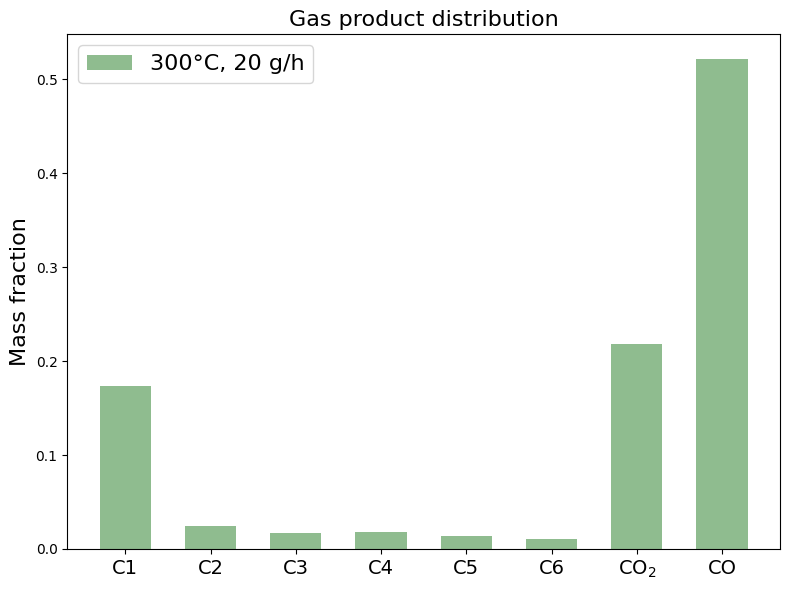

In [10]:
values = [0.174003297, 0.024362531, 0.016915509, 0.018552665, 0.013475814, 0.01022833, 0.218268046, 0.521996406]
products = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CO$_2$', 'CO']


plt.figure(figsize=(8, 6))
plt.bar(products,values, width=0.6, color= 'darkseagreen')
plt.title('Gas product distribution', fontsize=16)
plt.legend(['300\u00B0C, 20 g/h'], fontsize=16)
plt.ylabel('Mass fraction', fontsize=16)
plt.xticks(range(len(products)), products, fontsize=14)
plt.tight_layout()
plt.show()